In [38]:
import pandas as pd

df = pd.read_csv('./Consumer_Complaints.csv').set_index('Complaint ID')

In [134]:
import requests
import json

def getSentiment(text):
    endpoint = "https://gateway.watsonplatform.net/natural-language-understanding/api/v1/analyze"

    # You can register and get your own credentials
    # The ones below have a quota of 1000 calls per day 
    # and can run out quickly if multiple people use these
#     username = "apikey"
#     password = "your-api-key"
    username = 'apikey'
    password = 'your-api-key'
    
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2018-11-16',
        'text': text,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

In [149]:
# We will analyze the text below using the IBM Watson API

text = '''
I was given a credit of {$2000.00} with the Best Buy originally through City Bank. At a certain point they lowered my limit and this caused me to be over balance with them and have to pay extra fees. \n\nI was in college and the military at the time. This debt has been made whole with them. \n\nMy credit score was lower, their interest rate was high, they lowered my limit which increased my fees and made it difficult for me to pay them the amount they were asking. This was in XX/XX/XXXX and XX/XX/XXXX.
'''

In [150]:
ddf.loc[313, 'Consumer complaint narrative']

'I was given a credit of {$2000.00} with the Best Buy originally through City Bank. At a certain point they lowered my limit and this caused me to be over balance with them and have to pay extra fees. \n\nI was in college and the military at the time. This debt has been made whole with them. \n\nMy credit score was lower, their interest rate was high, they lowered my limit which increased my fees and made it difficult for me to pay them the amount they were asking. This was in XX/XX/XXXX and XX/XX/XXXX.'

In [152]:
data = getSentiment(text)
data

{'usage': {'text_units': 1, 'text_characters': 505, 'features': 2},
 'sentiment': {'document': {'score': -0.391859, 'label': 'negative'}},
 'language': 'en',
 'emotion': {'document': {'emotion': {'sadness': 0.580831,
    'joy': 0.498221,
    'fear': 0.184361,
    'disgust': 0.11723,
    'anger': 0.155626}}}}

In [41]:
df.dropna(subset=['Consumer complaint narrative'], inplace=True)

In [48]:
df['len'] = df['Consumer complaint narrative'].apply(lambda x: len(x))

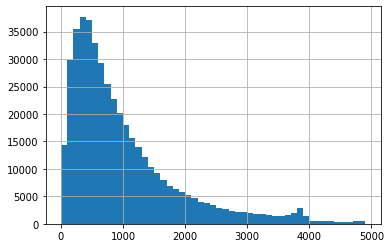

In [52]:
%matplotlib inline

df['len'].hist(bins=range(0,5000, 100))

In [54]:
ddf = df.sample(n=1000).reset_index()

In [86]:
results = []

for ix, row in df.iterrows():
    try:
        text = row['Consumer complaint narrative']
        st = dict(getSentiment(text))
        st['text'] = text
        st['id'] = ix
        results.append(st)
    except:
        continue

KeyboardInterrupt: 

In [139]:
len(results)

52522

In [140]:
re = pd.DataFrame(results)

In [143]:
re.tail()

,usage,sentiment,language,emotion,text,id,code,error
52517,NaN,NaN,NaN,NaN,Hello I check my credit and I see there a auto...,3210883,403.0,Forbidden
52518,NaN,NaN,NaN,NaN,Portfolio Recovery Associates has purchased an...,3210880,403.0,Forbidden
52519,NaN,NaN,NaN,NaN,On XX/XX/2019 and XX/XX/2019 I made payments t...,3210322,403.0,Forbidden
52520,NaN,NaN,NaN,NaN,TRANSUNION HAS NOT LET ME DISPUTE CLAIMS ON MY...,3210821,403.0,Forbidden
52521,NaN,NaN,NaN,NaN,I never received a mail notice that I could di...,3210918,403.0,Forbidden


In [146]:
for ix, row in re[re['code'] == 403.0].iterrows():
    try:
        text = row['text']
        st = dict(getSentiment(text))
        if st['code'] == 403.0:
            break
        re.loc[ix, 'usage'] = st['usage']
        re.loc[ix, 'sentiment'] = st['sentiment']
        re.loc[ix, 'language'] = st['language']
        re.loc[ix, 'emotion'] = st['emotion']
        re.loc[ix, 'code'] = st['code']
        re.loc[ix, 'error'] = st['error']
    except:
        continue
    if ix / 100 == 0:
        print(ix)

KeyboardInterrupt: 

In [153]:
re = re[re['code'] != 403].reset_index(drop=True)

In [154]:
re.loc[0, 'emotion']

{'document': {'emotion': {'sadness': 0.181185,
   'joy': 0.019271,
   'fear': 0.242187,
   'disgust': 0.132534,
   'anger': 0.204294}}}

In [155]:
re['sentiment_label'] = re['sentiment'].apply(lambda x: x['document']['label'])
re['sentiment_score'] = re['sentiment'].apply(lambda x: x['document']['score'])

In [156]:
re['sadness'] = re['emotion'].apply(lambda x: x['document']['emotion']['sadness'])
re['joy'] = re['emotion'].apply(lambda x: x['document']['emotion']['joy'])
re['fear'] = re['emotion'].apply(lambda x: x['document']['emotion']['fear'])
re['disgust'] = re['emotion'].apply(lambda x: x['document']['emotion']['disgust'])
re['anger'] = re['emotion'].apply(lambda x: x['document']['emotion']['anger'])

In [157]:
re.groupby('sentiment_label').size()

sentiment_label
negative    17563
neutral       385
positive      829
dtype: int64

In [158]:
re[re['sentiment_label'] == 'positive']

,usage,sentiment,language,emotion,text,id,code,error,sentiment_label,sentiment_score,sadness,joy,fear,disgust,anger
13,"{'text_units': 1, 'text_characters': 606, 'fea...","{'document': {'score': 0.47444, 'label': 'posi...",en,"{'document': {'emotion': {'sadness': 0.022044,...","This Company Sunrise Credit Services Inc, put ...",3399750,NaN,NaN,positive,0.474440,0.022044,0.154972,0.015914,0.003962,0.111649
23,"{'text_units': 1, 'text_characters': 647, 'fea...","{'document': {'score': 0.266879, 'label': 'pos...",en,"{'document': {'emotion': {'sadness': 0.039734,...",On XX/XX/2013 to XX/XX/2013 @ the address is X...,3400404,NaN,NaN,positive,0.266879,0.039734,0.047581,0.093248,0.011643,0.205470
25,"{'text_units': 1, 'text_characters': 664, 'fea...","{'document': {'score': 0.384877, 'label': 'pos...",en,"{'document': {'emotion': {'sadness': 0.077937,...",This particular account situation that is late...,3400807,NaN,NaN,positive,0.384877,0.077937,0.044916,0.013092,0.009457,0.137364
29,"{'text_units': 1, 'text_characters': 668, 'fea...","{'document': {'score': 0.384009, 'label': 'pos...",en,"{'document': {'emotion': {'sadness': 0.069221,...",This particular account situation that is late...,3400100,NaN,NaN,positive,0.384009,0.069221,0.046301,0.012442,0.010639,0.079911
31,"{'text_units': 1, 'text_characters': 675, 'fea...","{'document': {'score': 0.428927, 'label': 'pos...",en,"{'document': {'emotion': {'sadness': 0.175917,...",This particular account situation that is late...,3400065,NaN,NaN,positive,0.428927,0.175917,0.668384,0.063138,0.040010,0.104964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18717,"{'text_units': 1, 'text_characters': 85, 'feat...","{'document': {'score': 0.5853, 'label': 'posit...",en,"{'document': {'emotion': {'sadness': 0.011664,...",Hi there! \n\nI did not approve this inquiry I...,3314755,NaN,NaN,positive,0.585300,0.011664,0.241596,0.002310,0.017405,0.599456
18748,"{'text_units': 1, 'text_characters': 85, 'feat...","{'document': {'score': 0.5853, 'label': 'posit...",en,"{'document': {'emotion': {'sadness': 0.011664,...",Hi there! \n\nI did not approve this inquiry I...,3314831,NaN,NaN,positive,0.585300,0.011664,0.241596,0.002310,0.017405,0.599456
18753,"{'text_units': 1, 'text_characters': 85, 'feat...","{'document': {'score': 0.5853, 'label': 'posit...",en,"{'document': {'emotion': {'sadness': 0.011664,...",Hi there! \n\nI did not approve this inquiry I...,3314758,NaN,NaN,positive,0.585300,0.011664,0.241596,0.002310,0.017405,0.599456
18771,"{'text_units': 1, 'text_characters': 267, 'fea...","{'document': {'score': 0.767884, 'label': 'pos...",en,"{'document': {'emotion': {'sadness': 0.080893,...","On XX/XX/XXXX, I mailed in a credit investigat...",3314231,NaN,NaN,positive,0.767884,0.080893,0.213355,0.087035,0.006266,0.063824


In [159]:
re.loc[18771, 'text']

'On XX/XX/XXXX, I mailed in a credit investigation request to the credit bureaus. By law, they are required to complete their investigations and respond with the result, within 30 days. As of today ( XX/XX/XXXX ), I have yet to receive my credit investigation results.'

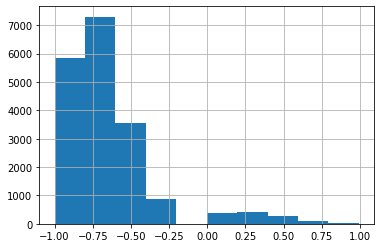

In [160]:
re['sentiment_score'].hist()

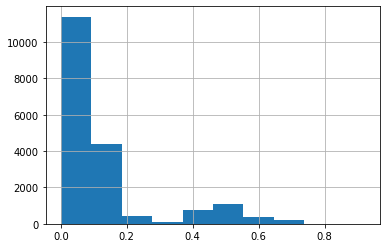

In [161]:
re['joy'].hist()

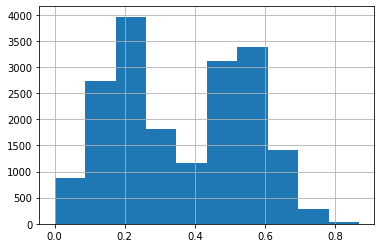

In [162]:
re['sadness'].hist()

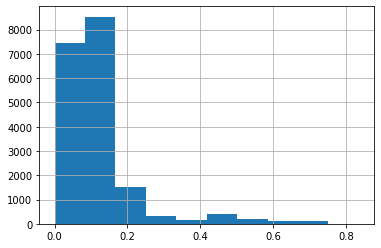

In [163]:
re['fear'].hist()

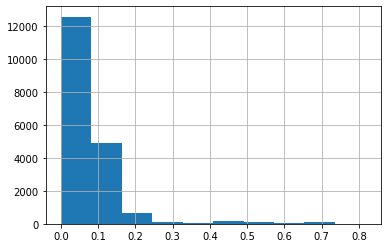

In [164]:
re['disgust'].hist()

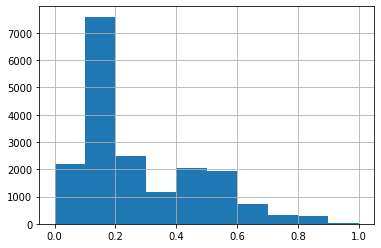

In [165]:
re['anger'].hist()

In [171]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVR

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
stop_words = set(stopwords.words('english'))

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

def tokenize(text):
    return [contraction_mapping[t] if t in contraction_mapping else t for t in text.lower().split(' ')]    
    

In [177]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(re['text'], re['sentiment_score'], test_size=0.33, random_state=42)

In [232]:
from sklearn.pipeline import Pipeline

vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words='english', ngram_range=(1, 3), max_df=0.5, min_df=5)
svr = LinearSVR(random_state=71, tol=1e-3, C=1.2)

pipe = Pipeline([
            ('vectorizer', vectorizer),
            ('regression', svr),
        ])

%time pipe.fit(x_train, y_train)

CPU times: user 13.6 s, sys: 534 ms, total: 14.2 s
Wall time: 15.1 s


Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=5,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=Tr...caling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=71, tol=0.001, verbose=0))])

In [233]:
y_hat = pipe.predict(x_test)

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_test, y_hat))
print(mean_squared_error(y_test, y_hat))

0.1437040482720609
0.05278418696696531


In [235]:
preds = pd.DataFrame(zip(x_test, y_test, y_hat), columns = ['text', 'score', 'prediction'])

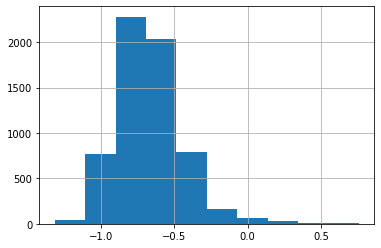

In [236]:
preds['prediction'].hist()

In [237]:
preds[preds['prediction'] < -1]

,text,score,prediction
140,When I changed my account from a student check...,-0.813655,-1.121395
197,On saturday XX/XX/2019 at XXXX i opened the ca...,-0.645698,-1.026944
301,I am filing a complaint due to continuous ( XX...,-0.996856,-1.003017
363,Due to Equifax security breach My personal inf...,-0.992620,-1.003598
373,A year ago I was scammed into using my vehicle...,-0.752270,-1.022135
...,...,...,...
6056,Fraudulent account in my name stolen identity ...,-0.877517,-1.110843
6129,I have been disputing on my credit report for ...,-0.938467,-1.021367
6141,I call every 6 months to re-establish my payme...,-0.820675,-1.076211
6174,"My mortgage company XXXX went chapter XXXX, se...",-0.764821,-1.031197


In [238]:
preds.loc[6195, 'text']

'XXXX  refuses to remove fraudulent negative accounts from my report that are not mine. I have tried to submit disputes on-line and now they have blocked access to me doing so. This is in violation of the FCRA.'

In [239]:
len(vectorizer.get_feature_names())

43322

In [240]:
df['sentiment'] = pipe.predict(df['Consumer complaint narrative'])

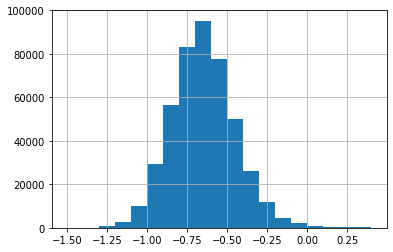

In [241]:
df['sentiment'].hist(bins=[i / 10 for i in range(-15, 5)])

In [244]:
df[df['sentiment'] < -1].sort_values('sentiment', ascending=False)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,len,sentiment
Complaint ID,,,,,,,,,,,,,,,,,,,
2832159,03/03/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,J.P. Morgan Chase Bank and NA subsidiary J.P. ...,NaN,JPMORGAN CHASE & CO.,FL,320XX,Servicemember,Consent provided,Web,03/03/2018,Closed with explanation,Yes,NaN,4894,-1.000017
3289312,06/27/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"THE DISPUTED ACCOUNT DOES NOT BELONG TO ME, I ...",NaN,"EQUIFAX, INC.",FL,330XX,NaN,Consent provided,Web,06/27/2019,Closed with explanation,Yes,NaN,189,-1.000020
3289315,06/27/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"THE DISPUTED ACCOUNT DOES NOT BELONG TO ME, I ...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,330XX,NaN,Consent provided,Web,06/27/2019,Closed with explanation,Yes,NaN,189,-1.000020
3289306,06/27/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,"THE DISPUTED ACCOUNT DOES NOT BELONG TO ME, I ...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,330XX,NaN,Consent provided,Web,06/27/2019,Closed with non-monetary relief,Yes,NaN,189,-1.000020
3119480,01/08/2019,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,At first it started off with messages being le...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,VA,231XX,NaN,Consent provided,Web,01/09/2019,Closed with explanation,Yes,NaN,2229,-1.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2851856,03/22/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,cra violation inaccurate information po report...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,770XX,NaN,Consent provided,Web,03/22/2018,Closed with explanation,Yes,NaN,131,-1.460093
2851857,03/22/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,cra violation inaccurate information po report...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,TX,770XX,NaN,Consent provided,Web,03/22/2018,Closed with explanation,Yes,NaN,131,-1.460093
2477637,05/06/2017,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Public record information inaccurate,I have repeatedly tried to apply for student l...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,AZ,853XX,NaN,Consent provided,Web,05/06/2017,Closed with explanation,Yes,NaN,524,-1.466357


In [245]:
df.loc[2664713, 'Consumer complaint narrative']

'mI have contacted Early Warning by phone and by mail and made them aware that they are continuing to report fraudulent information against me, and I have informed them that the accounts that they are reporting were as a result of identity theft. Early Warning has told me that they do not care that they will not stop reporting this information unless the banks themselves tell them to not report this fraudulent information. I tried to explain to Early Warning in Writing and by phone that this was fraudulent information and that these accounts were opened when my identity was compromised in 2010, but again they have told me they are not concerned. I have sent them requests to delete this fraudulent information by phone and by certified mail and they have ignored my requests. I have made them aware that they were defaming my character and they were ruining me financially by continuing to report these fraudulent accounts and they have again told me that they refused to stop reporting this 

In [256]:
pipe.fit(re['text'], re['sentiment_score'])

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=5,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=Tr...caling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=71, tol=0.001, verbose=0))])

In [257]:
df['sentiment'] = pipe.predict(df['Consumer complaint narrative'])

In [258]:
re.columns

Index(['usage', 'sentiment', 'language', 'emotion', 'text', 'id', 'code',
       'error', 'sentiment_label', 'sentiment_score', 'sadness', 'joy', 'fear',
       'disgust', 'anger'],
      dtype='object')

In [259]:
pipe.fit(re['text'], re['sadness'])
df['sadness'] = pipe.predict(df['Consumer complaint narrative'])

In [260]:
pipe.fit(re['text'], re['joy'])
df['joy'] = pipe.predict(df['Consumer complaint narrative'])

In [261]:
pipe.fit(re['text'], re['fear'])
df['fear'] = pipe.predict(df['Consumer complaint narrative'])

In [262]:
pipe.fit(re['text'], re['disgust'])
df['disgust'] = pipe.predict(df['Consumer complaint narrative'])

In [263]:
pipe.fit(re['text'], re['anger'])
df['anger'] = pipe.predict(df['Consumer complaint narrative'])

In [266]:
df[df['anger'] < 0]

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Company response to consumer,Timely response?,Consumer disputed?,len,sentiment,sadness,joy,fear,disgust,anger
Complaint ID,,,,,,,,,,,,,,,,,,,,,
3390310,09/30/2019,"Payday loan, title loan, or personal loan",Payday loan,Can't contact lender or servicer,NaN,"In XX/XX/XXXX, I foolishly took out a loan wit...",Company has responded to the consumer and the ...,"KMD Partners, LLC d/b/a CreditNinja",SC,NaN,...,Closed with explanation,Yes,NaN,6733,-0.346863,0.159854,0.350610,0.092341,0.019137,-0.051623
3363541,09/04/2019,Debt collection,Medical debt,Written notification about debt,Notification didn't disclose it was an attempt...,I received a letter from Fox Collection Compan...,Company believes it acted appropriately as aut...,Professional Recovery Management,TN,371XX,...,Closed with explanation,Yes,NaN,7640,-0.638231,0.579275,0.242037,0.275806,0.167678,-0.017374
3353296,08/25/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,Multiple accounts are reporting on my credit r...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,334XX,...,Closed with explanation,Yes,NaN,111,-0.656686,0.104103,0.032597,0.046659,0.010033,-0.017740
3348037,08/20/2019,Student loan,Federal student loan servicing,Struggling to repay your loan,Problem lowering your monthly payments,I would like to bring to your attention an ong...,NaN,AES/PHEAA,NY,100XX,...,Closed with explanation,Yes,NaN,8161,-0.379905,0.339362,0.344731,0.059565,0.179120,-0.132334
3339125,08/13/2019,Credit card or prepaid card,Store credit card,"Advertising and marketing, including promotion...",Confusing or misleading advertising about the ...,I am writing this at XXXX am due to the inabil...,Company has responded to the consumer and the ...,SYNCHRONY FINANCIAL,MO,NaN,...,Closed with explanation,Yes,NaN,9134,-0.896103,0.301088,0.229386,0.128981,-0.116993,-0.079462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290733,03/19/2015,Debt collection,I do not know,Communication tactics,Frequent or repeated calls,Continued robot calls. Will not give me addres...,Company believes it acted appropriately as aut...,"Receivables Performance Management, LLC",PA,174XX,...,Closed with explanation,Yes,No,447,-0.147835,0.380060,0.283662,0.070339,0.018003,-0.035321
1290538,03/19/2015,Debt collection,I do not know,Cont'd attempts collect debt not owed,Debt is not mine,XXXX sent me a letter stating I owed over {$32...,NaN,SYNCHRONY FINANCIAL,MI,NaN,...,Closed with non-monetary relief,Yes,No,969,-0.785652,0.711276,0.342997,0.268609,0.166660,-0.014567
1290262,03/19/2015,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,I am a homeownership advisor with XXXX XXXX. O...,NaN,Specialized Loan Servicing LLC,OR,972XX,...,Closed with explanation,Yes,No,196,-0.776213,0.410708,0.271322,-0.015657,0.022722,-0.082830


In [280]:
top_30 = list(df.groupby('Company').size().sort_values(ascending=False).head(30).index)

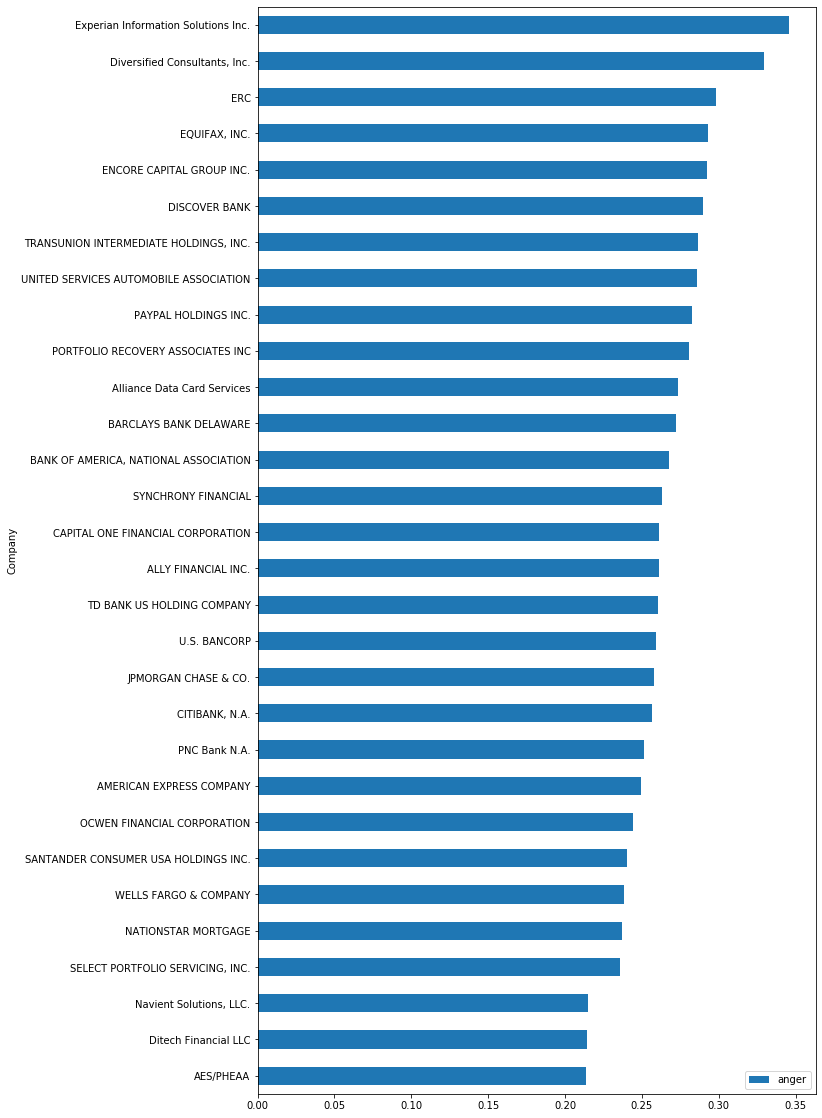

In [289]:
import numpy as np

df[df['Company'].isin(top_30)].groupby('Company').agg({'anger' : lambda x: np.abs(np.mean(x))}).sort_values('anger', ascending=True).plot(kind='barh', figsize=(10, 20))